- MNR: Multiple Negative Rankings Loss. 
    - This was the reason SBERT got outpreformed by newer transformer models so easily

- Similar to Softmax Loss MNR requires the following labeling procedure.
    - 0 — entailment, e.g. the premise suggests the hypothesis.
    - 1 — neutral, the premise and hypothesis could both be true, but they are not necessarily related.
    - 2 — contradiction, the premise and hypothesis contradict each other.
- When fine-tuning MNR loss; the newutral and condridictions rows can be dropped, only leaving entailment. 
    - These are fed in as sentence A and B (the label is not used unlike softmax loss)
    - Finlter for entailment only 
### Training with PyTorch 
- Data Preperation 
    - Must tokenize data (can use BertTokenizer)
    - Load data in batches into model (bach size of 32 is good; can use DataLoader)
- PyTorch Fine-Tuning
    - Fine-Tuning is for building sentence embeddings 
    - Uses a siamese-BERT architecture; where A is the anchor and B is the positive. Recall Softmax Loss uses this aswell. 
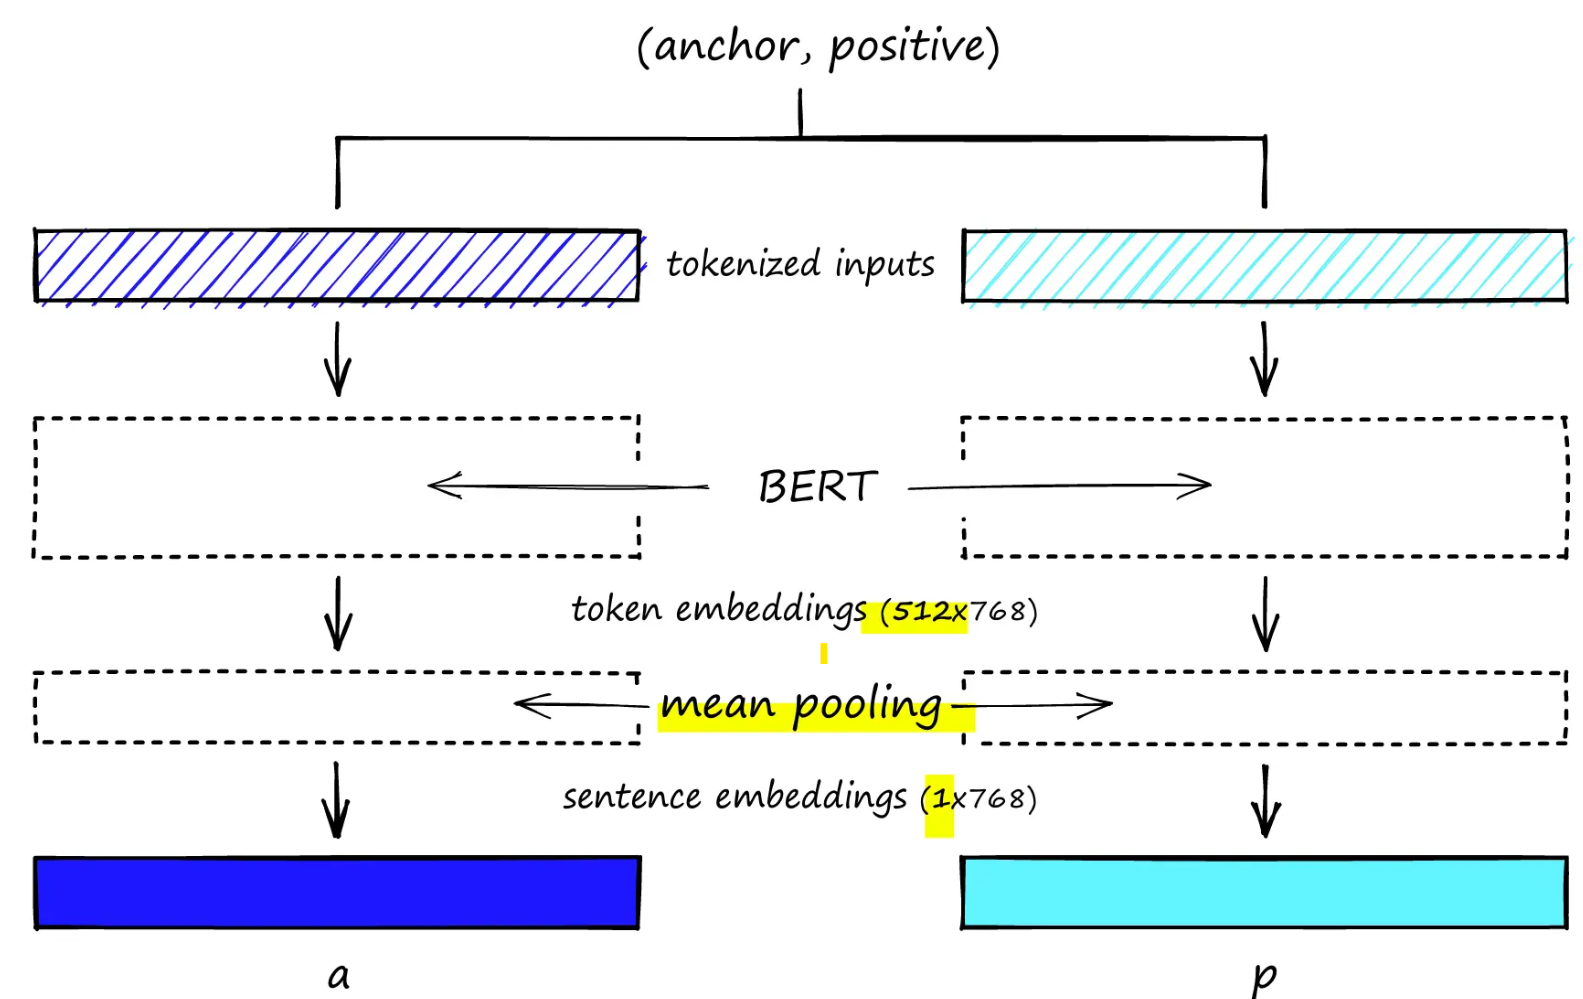
    - This is further extended into triplet networks; 3 sentences get passes, an anchor, a positive, and a negative. (Note: The negative pair would be the rows labeled 2 from the dataset)
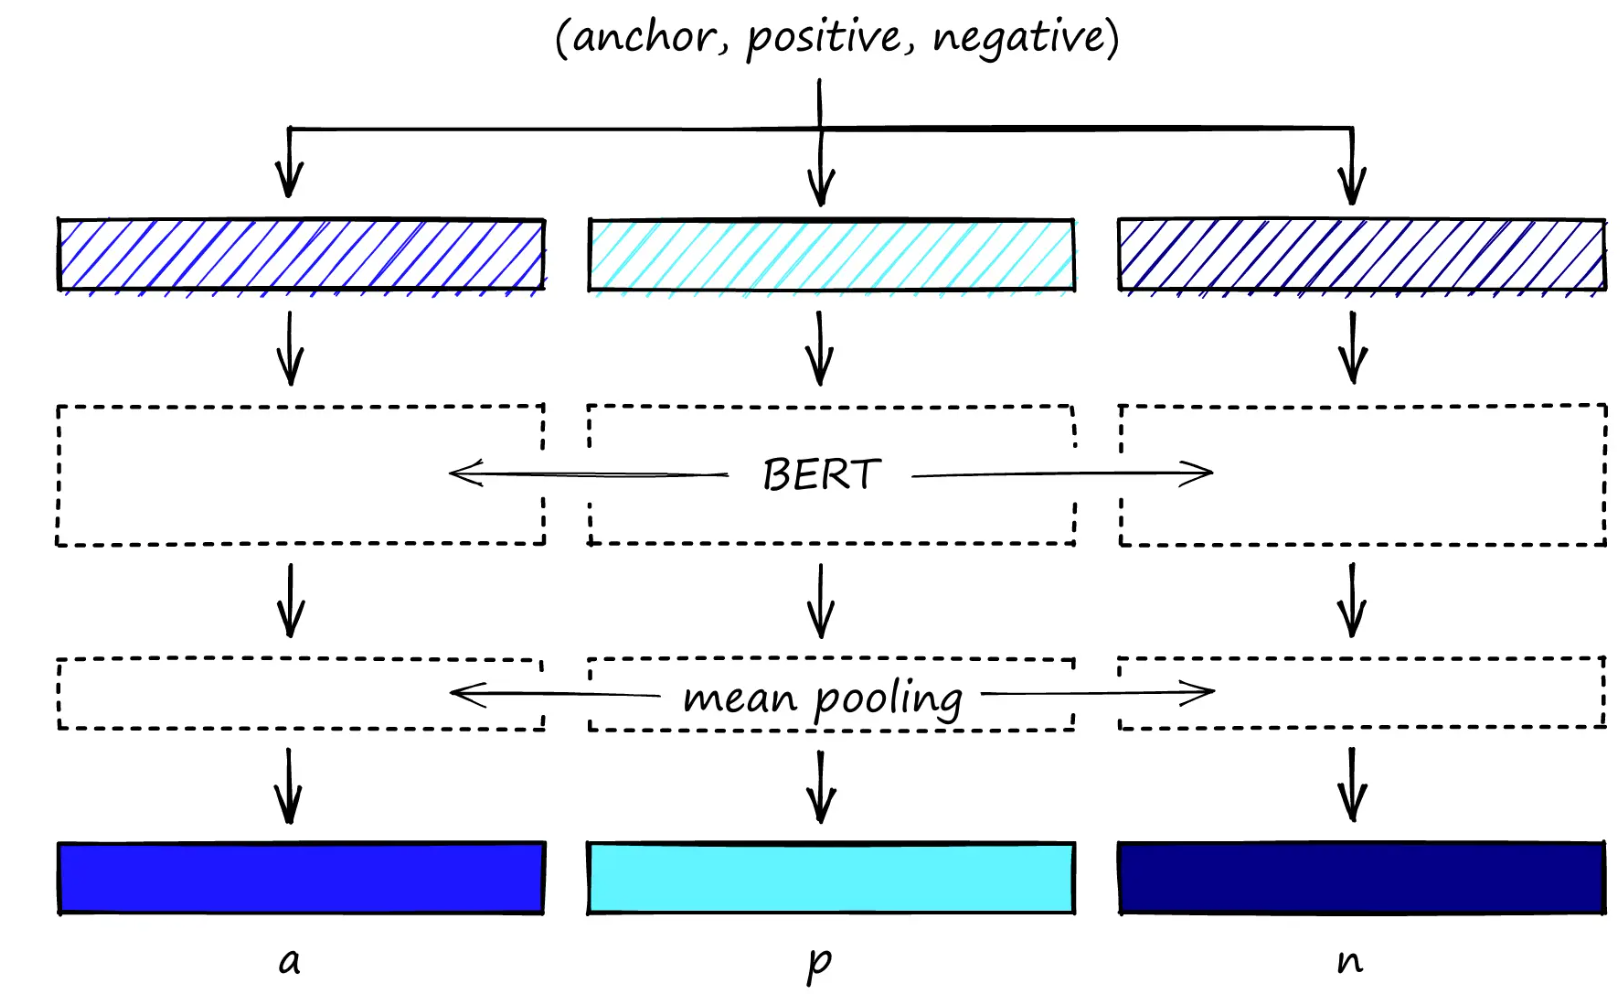
    - For this example triplet networks are not being used! 
    - BERT outputs 512 768-dimensional embeddings. These are converted into an average using mean pooling. 
        - Two mean poolings are produced per step: for a, the anchor and p, the positive. 
    - A resized mask is applied to the token embeddings in the mean pooling function. 
    - Pooling Transforms the token level embedding (512*768) to sentence-level embedding (1*768)
    - Steps are then done in batches. 
        - First a cosine simularity between each anchor() and all the positive embeddings (p) within the batch.
        - Next a vector cosine simularity of each anchor embedding is produced a_i. Each anchor shares the highest positive score with its positive pair, p_i.  (creates a diagonal on the matrix)
            - Label values are always in ascending order 
            - The score is given by the cross entropy loss.  
    - Training loop is ready to set up (can use an Adam optimizer with a linear warmup of 10%) linear warmup????



In [ ]:
import datasets 

snli = datasets.load_dataset('snli', split='train')
mnli = datasets.load_dataset('glue', 'mnli', split='train')

snli = snli.cast(mnli.features)


